In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from seaborn import violinplot
import numpy as np
import ast

In [2]:
def bootstrap_median_conf_interval(data, num_bootstrap_samples=10000, confidence_level=0.95):
    """
    input: (list[float]) data
    return: (float, float) lower and upper bound for median value with 95% CI

    The bootstraping sample is 20% of randomly taken numbers
    """
    medians = np.zeros(num_bootstrap_samples)
    n = len(data)
    
    for i in range(num_bootstrap_samples):
        sample = np.random.choice(data, size=int(n*0.2), replace=True)
        medians[i] = np.median(sample)
    
    lower_bound = np.percentile(medians, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(medians, (1 + confidence_level) / 2 * 100)
    
    return lower_bound, upper_bound

W* Org Pair	 95% interval width
claim C-P		0.008631554618477755
claim C-S		0.0076381172984837375
claim P-C		0.007492363452910933
claim P-S		0.00853589326143267
claim S-C		0.007972106337547524
claim S-P		0.008282452821731456
why C-P		0.008204973489046363
why C-S		0.007572142779827429
why P-C		0.006786897778511047
why P-S		0.007503328844905122
why S-C		0.007906049489974976
why S-P		0.008381843566894531
what C-P		0.008535922318696931
what C-S		0.007808260433375902
what P-C		0.006710216403007507
what P-S		0.008404448628425487
what S-C		0.0075637251138690464
what S-P		0.00798406898975379
claim A-B		0.011734311282634913
claim A-O		0.008570733293890909
claim B-A		0.011614718288183168
claim B-O		0.009860518947243602
claim O-A		0.015651822462678044
claim O-B		0.015801668167114258
why A-B		0.010470837354660034
why A-O		0.010019688308238739
why B-A		0.01007652059197428
why B-O		0.009969189763069153
why O-A		0.01606689095497127
why O-B		0.01705744322389402
what A-B		0.0111439097672702
what A-O		0.

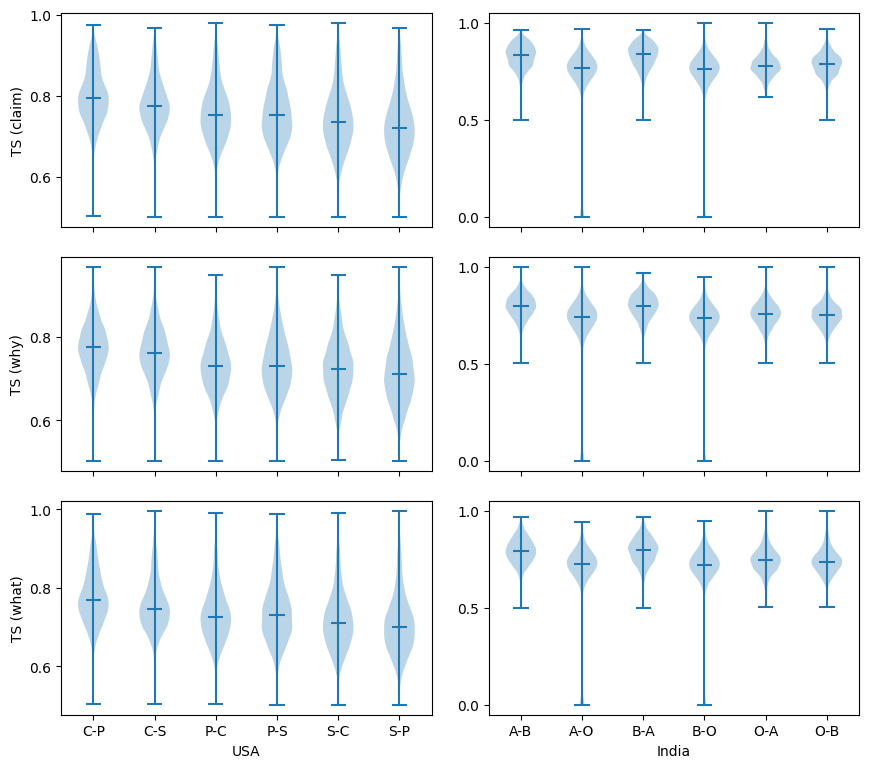

In [3]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(9, 8))

plt.rcParams['font.size'] = 17

map_fn = {'claim': [ax1], 'why': [ax3], 'what': [ax5]}

print("W*","Org Pair\t", "95% interval width")
for f in ['claim', 'why', 'what']:
    df1 = pd.read_json('../RQ1/Cosine Scores/checkyourfact_'+f+'_all_cosine_NEW.json')
    df2 = pd.read_json('../RQ1/Cosine Scores/politifact_'+f+'_all_cosine_NEW.json')
    df3 = pd.read_json('../RQ1/Cosine Scores/snopes_'+f+'_all_cosine_NEW.json')
    for th, ax in zip([0.75], map_fn[f]):
        threshold = th
        def noAboveThreshold(x):
            maxi = 0
            for i in x:
                maxi = max(maxi, (i+1)/2)

            return maxi

        data = []
        for i in df1.columns:
            data.append(list(df1[i].apply(noAboveThreshold)))

        for i in df2.columns:
            data.append(list(df2[i].apply(noAboveThreshold)))

        for i in df3.columns:
            data.append(list(df3[i].apply(noAboveThreshold)))

        for p,d in zip(["C-P", "C-S", "P-C", "P-S", "S-C", "S-P"], data):
            print(f,p,end='\t\t')
            mini,maxi = bootstrap_median_conf_interval(d)
            print(maxi-mini)

        if(ax==ax5):
            ax.set_xlabel("USA")
            ax.violinplot(data, showmedians=True)
            ax.set_xticks(np.arange(1, 7), ["C-P", "C-S", "P-C", "P-S", "S-C", "S-P"])
        else:
            ax.violinplot(data, showmedians=True)
            ax.set_xticks(np.arange(1, 7), [""]*6)
        
        ax.set_ylabel("TS ("+f+")")

map_fn = {'claim': [ax2], 'why': [ax4], 'what': [ax6]}
for f in ['claim', 'why', 'what']:
    df1 = pd.read_json('../RQ1/Cosine Scores/altnews_'+f+'_all_cosine_NEW.json')
    df2 = pd.read_json('../RQ1/Cosine Scores/boomlive_'+f+'_all_cosine_NEW.json')
    df3 = pd.read_json('../RQ1/Cosine Scores/opindia_'+f+'_all_cosine_NEW.json')
    for th, ax in zip([0.75], map_fn[f]):
        threshold = th
        def noAboveThreshold(x):
            maxi = 0
            for i in x:
                maxi = max(maxi, (i+1)/2)

            return maxi

        data = []
        for i in df1.columns:
            data.append(list(df1[i].apply(noAboveThreshold)))

        for i in df2.columns:
            data.append(list(df2[i].apply(noAboveThreshold)))

        for i in df3.columns:
            data.append(list(df3[i].apply(noAboveThreshold)))

        for p,d in zip(["A-B", "A-O", "B-A", "B-O", "O-A", "O-B"], data):
            print(f,p,end='\t\t')
            mini,maxi = bootstrap_median_conf_interval(d)
            print(maxi-mini)

        if(ax==ax6):
            ax.set_xlabel("India")
            ax.violinplot(data, showmedians=True)
            ax.set_xticks(np.arange(1, 7), ["A-B", "A-O", "B-A", "B-O", "O-A", "O-B"])
        else:
            ax.violinplot(data, showmedians=True)
            ax.set_xticks(np.arange(1, 7), [""]*6)

fig.tight_layout()
#plt.savefig('TS.svg', format='svg')
#plt.savefig('TS.pdf', format='pdf')
plt.show()

C-P	1.0 1.0 0.0
C-S	1.0 1.0 0.0
P-C	1.0 1.0 0.0
P-S	1.0 1.0 0.0
S-C	1.0 1.0 0.0
S-P	1.0 1.0 0.0
A-B	1.0 1.0 0.0
A-O	0.75 1.0 0.25
B-A	1.0 1.0 0.0
B-O	1.0 1.0 0.0
O-A	0.75 1.0 0.25
O-B	0.8 1.0 0.19999999999999996


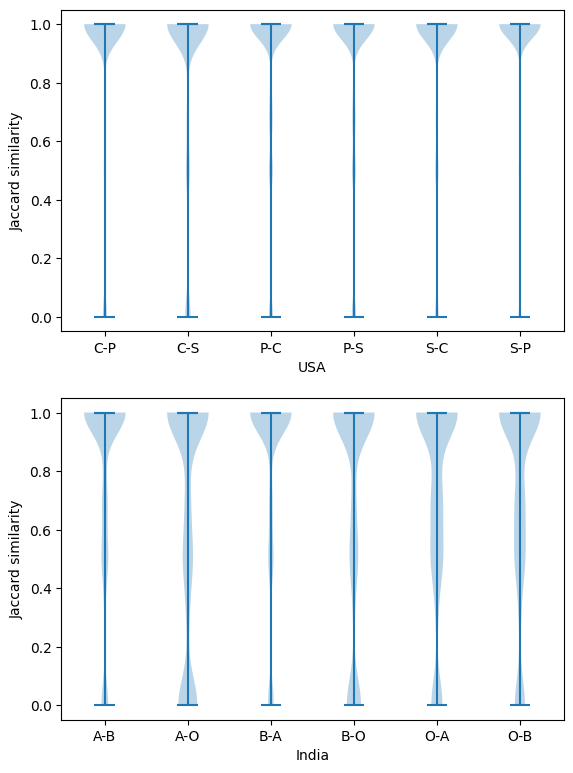

In [3]:
fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(6, 8))

plt.rcParams['font.size'] = 15.5

df1 = pd.read_json("../RQ1/Entity Intersection/checkyourfact.json")
df2 = pd.read_json("../RQ1/Entity Intersection/politifact.json")
df3 = pd.read_json("../RQ1/Entity Intersection/snopes.json")

data = []
for df in [df1,df2,df3]:
    data1 = []
    data2 = []
    for i in range(len(df)):
        row = df.iloc[i]
        try:
            data1.append(len(np.intersect1d(row.X, row.Y))/len(row.X))
            data2.append(len(np.intersect1d(row.X, row.Z))/len(row.X))
        except:
            pass

    data.append(data1)
    data.append(data2)

for p,d in zip(["C-P", "C-S", "P-C", "P-S", "S-C", "S-P"], data):
    print(p,end='\t')
    mini,maxi = bootstrap_median_conf_interval(d)
    print(mini,maxi, maxi-mini)

ax1.violinplot(data, showmedians=True)
ax1.set_xticks(np.arange(1, 7), ["C-P", "C-S", "P-C", "P-S", "S-C", "S-P"])
ax1.set_xlabel("USA")
ax1.set_ylabel("Jaccard similarity")

#########################################################################
df1 = pd.read_json("../RQ1/Entity Intersection/altnews.json")
df2 = pd.read_json("../RQ1/Entity Intersection/boomlive.json")
df3 = pd.read_json("../RQ1/Entity Intersection/opindia.json")

data = []
for df in [df1,df2,df3]:
    data1 = []
    data2 = []
    for i in range(len(df)):
        row = df.iloc[i]
        try:
            data1.append(len(np.intersect1d(row.X, row.Y))/len(row.X))
            data2.append(len(np.intersect1d(row.X, row.Z))/len(row.X))
        except:
            pass

    data.append(data1)
    data.append(data2)

for p,d in zip(["A-B", "A-O", "B-A", "B-O", "O-A", "O-B"], data):
    print(p,end='\t')
    mini,maxi = bootstrap_median_conf_interval(d)
    print(mini,maxi, maxi-mini)

ax2.violinplot(data, showmedians=True)
ax2.set_xticks(np.arange(1, 7), ["A-B", "A-O", "B-A", "B-O", "O-A", "O-B"])
ax2.set_xlabel("India")
ax2.set_ylabel("Jaccard similarity")
ax1.set_ylim(ax2.get_ylim())
fig.tight_layout()
#plt.savefig('JS.svg', format='svg')
#plt.savefig('JS.pdf', format='pdf')
plt.show()

In [2]:
files = ['checkyourfact', 'politifact', 'snopes','altnews', 'boomlive', 'opindia'][::-1]

data = {}
for f in files:
    df = pd.read_excel('../Cleaned Data/'+f+'.xlsx')
    
    data[f] = list(df.date_year.value_counts().sort_index())

print("Year-wise # of articles :)")
data

Year-wise # of articles :)


{'opindia': [148, 404, 400, 260, 174, 134],
 'boomlive': [337, 704, 841, 693, 701, 717],
 'altnews': [535, 1013, 987, 790, 474, 435],
 'snopes': [1671, 1246, 1868, 2354, 1178, 1319],
 'politifact': [1391, 1317, 2202, 1670, 1760, 1489],
 'checkyourfact': [283, 545, 1220, 1113, 1460, 1780]}

In [6]:
for f in files:
    df = pd.read_excel('../Cleaned Data/'+f+'.xlsx')
    print(f)
    wrdcnt = {}
    for y in range(2018, 2024):
        tmp = df[df.date_year==y].text.apply(lambda x: len(x.split(' ')))
        wrdcnt[y] = (tmp.mean(), tmp.std())
    
    print(wrdcnt)

opindia
{2018: (720.1081081081081, 577.7448079066249), 2019: (709.0940594059406, 451.99489013598225), 2020: (727.7, 401.0622486825402), 2021: (746.5038461538461, 378.06851637494634), 2022: (729.9655172413793, 405.5674665235515), 2023: (840.4626865671642, 536.5631742401101)}
boomlive
{2018: (590.0860534124629, 347.0632082905957), 2019: (563.2769886363636, 372.4801215489197), 2020: (586.7574316290131, 207.5854113257971), 2021: (531.939393939394, 215.06753696117286), 2022: (508.9315263908702, 212.3383779095014), 2023: (533.3905160390516, 239.87180193270495)}
altnews
{2018: (637.1121495327103, 451.6034422442648), 2019: (490.20829220138205, 399.79998834687274), 2020: (514.1276595744681, 339.1934203139463), 2021: (470.7746835443038, 317.284457526958), 2022: (571.4345991561181, 461.7417811481573), 2023: (759.3908045977012, 656.0313643929865)}
snopes
{2018: (653.6864153201676, 454.2255564108905), 2019: (660.5128410914928, 486.46823700844686), 2020: (617.3099571734475, 417.64578135016654), 2021

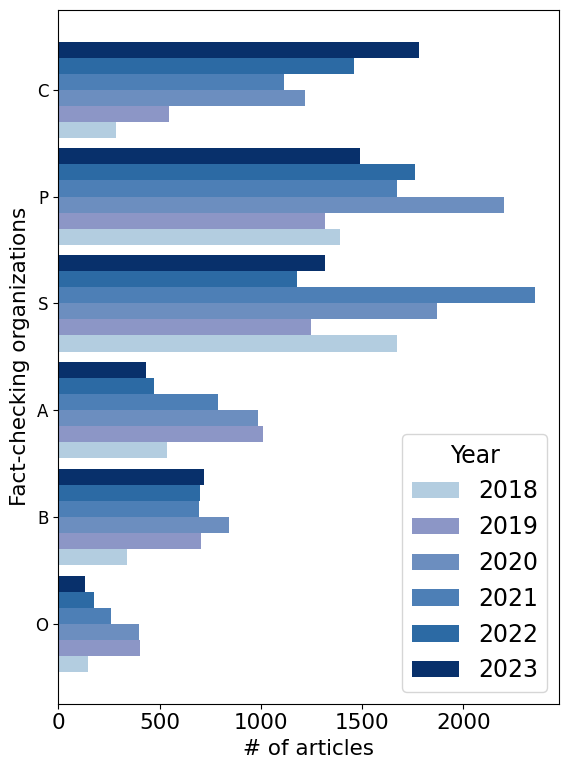

In [6]:
years = ['2018', '2019', '2020', '2021', '2022', '2023']

# Convert data to numpy array for easier manipulation
values = np.array([data[org] for org in data])

index = np.arange(len(data))
bar_width = 0.15

colors = ['#b3cde0', '#8c96c6', '#6c8ebf', '#4d7fb6', '#2c6aa4', '#08306b']

fig, ax = plt.subplots(figsize=(6, 8))
plt.rcParams['font.size'] = 17

for i, year in enumerate(years):
    ax.barh(index + i * bar_width, values[:, i], bar_width, color=colors[i], label=year)

ax.set_xlabel('# of articles')
ax.set_ylabel('Fact-checking organizations')

ax.set_yticks(index + bar_width * (len(data) - 1) / 2)
ax.set_yticklabels([i[0].upper() for i in data.keys()], fontsize=12)

ax.legend(title='Year', loc='lower right')

plt.tight_layout()
#plt.savefig('Stats.svg', format='svg')
plt.show()